<a href="https://colab.research.google.com/github/henriquepaes1/healthInsurance/blob/main/Prevendo_custo_de_Plano_de_S%C3%A1ude_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# Prevendo custo de Plano de Sáude com PyCaret


A área da saúde vem cada vez mais utilizando tecnologia para resolver seus problemas. Sejam algoritmos complexos de detecção de anomalias em exames de imagem ou modelos que estimam se um paciente é propenso a ter problemas cardiovasculares, a ciência de dados vem cada dia mais andando de mãos dadas com a saúde, e isso traz cada vez mais benefícios à população.

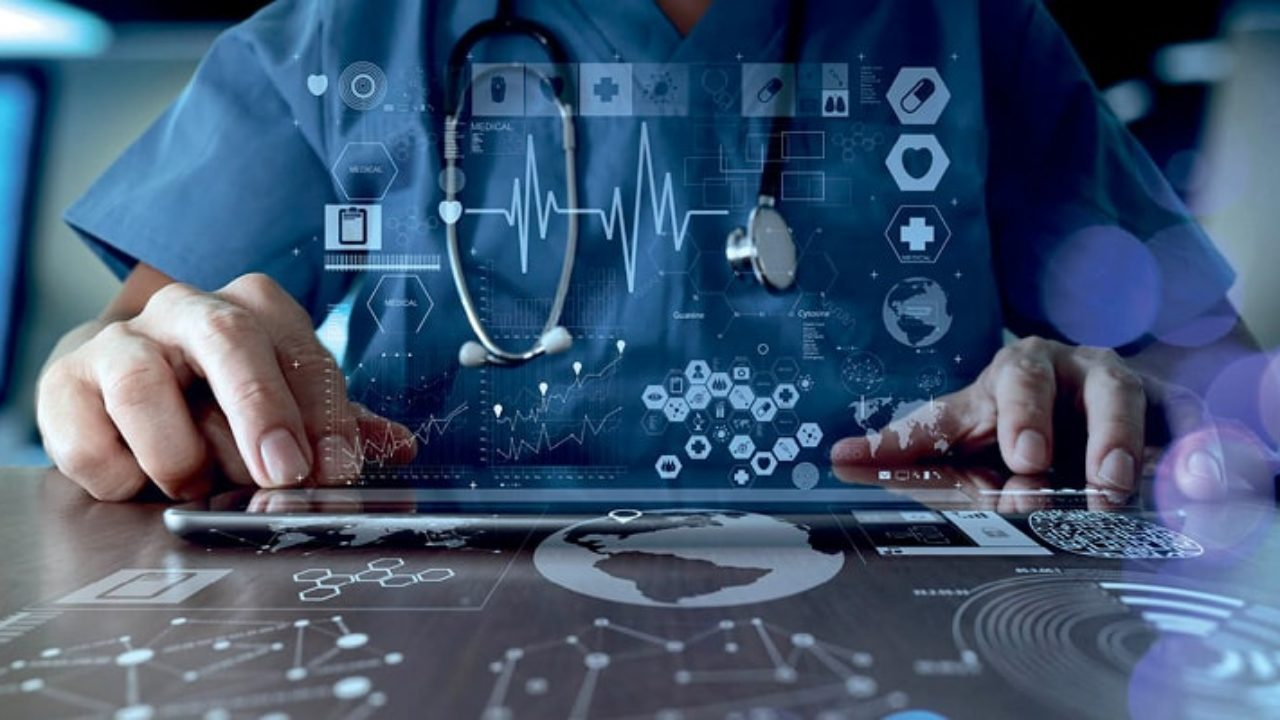

Além dos exemplos ditos acima, Machine Learning pode também ser usado a fim de trazer respostas para empresas sobre seus clientes e comportamentos, mas, como  os pacientes podem se aproveitar desses recursos? Em um cenário, onde as empresas, que possuem quantidades inestimáveis de dados de seus clientes, fornecem uma ferramenta de estimativa de preço de seus serviços. Esse artigo traz um modelo de Machine Learning de regressão para estimar o preço de um plano de saúde de um cliente, baseado em algumas informações pessoais. 

## Análise Exploratória

In [ ]:
# importando bibliotecas
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv(https://raw.githubusercontent.com/henriquepaes1/healthInsurance/main/insurance.csv)

In [ ]:
# Analisando as primeiras entradas do dataset
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Aqui, é possível notar que trata-se de um dataset com poucas variáveis, relativamente simples. Veremos mais detalhes adiante

In [ ]:
df.shape

(1338, 7)

Também é possível notar que trata-se de um dataset com poucas entradas, o que pode causar problemas com outliers. Será necessário substituí-los pela média quando necessário.

### Dicionário de variáveis
* Age - idade
* Sex - Sexo
* BMI - Body Mass Index, índice de massa corporal, conhecido em português como IMC (índice de massa corporal)
* Children - número de filhos
* Smoker - fumante ou não
* Region - região onde a pessoa mora, não foi possível idenficar o país.
* Charges - quanto custaria o seguro de vida para esse determinado cliente

In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

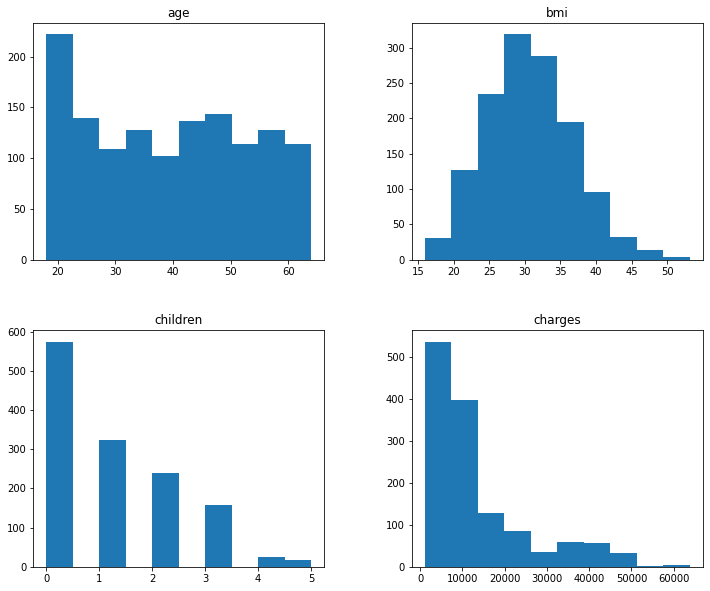

In [ ]:
df.hist(figsize=(12, 10), grid=False);


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


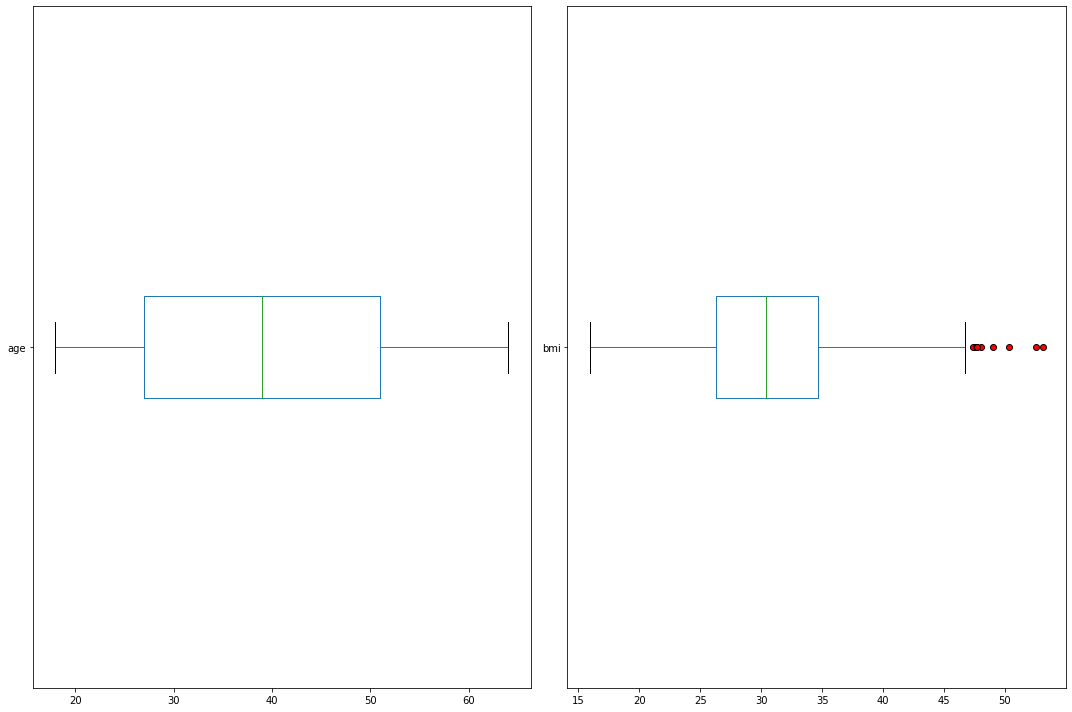

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
outliers = dict(marker='o', markerfacecolor='r',)
df.boxplot(['age'], vert=False, grid=False, flierprops=outliers, ax=ax[0])
df.boxplot(['bmi'], vert=False, grid=False, flierprops=outliers, ax=ax[1])
plt.tight_layout()
plt.show()

É possível verificar muitos outliers na variável charges, mas, sabendo que essa pode ser uma variável importante nas predições do modelo, não vamos realizar nenhuma mudança.

In [ ]:
!pip install pandas-profiling --upgrade

In [ ]:
analise = ProfileReport(df, title='Analise exploratória com Pandas Profilling')


In [ ]:
# visualizar report
analise.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Agora que já sabemos como é o nosso conjunto de dados, é possível começá-lo a prepará-lo para criar os modelos.

## Regressão com PyCaret

In [ ]:
# Separar uma parte do dataset como unseen data
test = df.sample(frac=0.10)
train = df.drop(test.index)

Agora que já separamos uma parte do dataset para que o pipeline do PyCaret não tenha contato com esses dados, podemos fazer o "acabamento" dos nossos dados, criando um *pipeline* com o PyCaret. Para esse problema, será necessário realizar normalização das colunas numéricas (BMI e Age) e tratar as colunas com variáveis categóricas. O método utilizado para as variáveis Smoker, Region e Sex será o One-Hot Encoding, que é o default para o PyCaret, para saber mais sobre esse método, [acesse](https://www.linkedin.com/pulse/machine-learning-lidando-com-vari%C3%A1veis-categ%C3%B3ricas-paes-de-souza/).

In [ ]:
# instalando a biblioteca
!pip install pycaret -q

In [ ]:
# configurando PyCaret para o Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# Importando as ferramentas do PyCaret
from pycaret.regression import setup, compare_models, models, create_model, predict_model
from pycaret.regression import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.regression import save_model, get_config

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### Tratando o dataset

In [ ]:
exp = setup(data=train, 
            target='charges',
            normalize=True,
            categorical_features = ['sex', 'smoker', 'region'],
            numeric_features = ['bmi', 'age', 'children']
            )

,Description,Value
0,session_id,1304
1,Target,charges
2,Original Data,"(1204, 7)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(842, 9)"


Aqui, é necessário especificar que a variavel *children* é numérica, pois é importante notar que, quanto mais dependentes no plano de saúde, maior o preço, portanto essa variável pode nos trazer certa ordinalidade. Vamos olhar como ficou o dataset após o tratamento aplicado pela biblioteca.

In [ ]:
X_train = get_config('X_train')
X_train.head(10)

,age,bmi,children,sex_female,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest
1084,1.625364,-0.021001,0.764133,1.0,1.0,0.0,1.0,0.0,0.0
835,0.218759,0.858944,0.764133,0.0,1.0,0.0,0.0,1.0,0.0
274,-0.976855,-0.494324,-0.891980,0.0,1.0,0.0,1.0,0.0,0.0
623,-1.469167,0.467589,-0.891980,0.0,0.0,1.0,0.0,0.0,0.0
379,1.625364,0.134094,-0.063924,0.0,1.0,0.0,0.0,1.0,0.0
681,-1.398837,-1.659547,-0.891980,0.0,1.0,0.0,0.0,0.0,1.0
275,0.570410,-0.647008,0.764133,1.0,1.0,1.0,0.0,0.0,0.0
106,-1.398837,-0.357711,-0.063924,1.0,1.0,0.0,0.0,0.0,1.0
995,0.007768,-1.181404,1.592189,1.0,1.0,1.0,0.0,0.0,0.0
1196,-1.398837,-0.097344,-0.891980,1.0,0.0,0.0,1.0,0.0,0.0


Nesse momento, é possível perceber que as variáveis categóricas já foram devidamente tratadas e o dataset já possui valores reajustados para uma escala comum.

In [ ]:
X_train.describe()

,age,bmi,children,sex_female,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest
count,8.420000e+02,8.420000e+02,8.420000e+02,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000
mean,-1.337919e-08,5.450781e-09,-2.123681e-09,0.485748,0.793349,0.232779,0.242280,0.283848,0.241093
std,1.000594e+00,1.000594e+00,1.000597e+00,0.500093,0.405143,0.422853,0.428719,0.451130,0.428001
min,-1.469167e+00,-2.219658e+00,-8.919802e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-9.065252e-01,-7.655393e-01,-8.919802e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,7.768068e-03,-5.234214e-02,-6.392360e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,8.517311e-01,6.180635e-01,7.641330e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.766024e+00,3.616908e+00,3.248303e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Nesse momento, o dataset já está devidamente tratado e já é possível pensar em criar os modelos de Machine Learning. Como métrica principal, escolhemos o MSE (Mean Squared Error), uma métrica que, "pune" o modelo por erros mais grotescos, e nos mostra numericamente a distância entre os pontos e a nossa reta. Vale lembrar de, apesar de termos o MSE como o critério principal, ainda é válido considerar as outras métricas mostradas.

### Escolhendo algoritmo

In [ ]:
# Comparar os algoritmos de regressão
best = compare_models(sort='MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2814.0691,2.350374e+07,4782.4772,0.8419,0.4627,0.3381,0.133
rf,Random Forest Regressor,2921.5261,2.600666e+07,5034.7798,0.8249,0.4732,0.3387,0.693
lightgbm,Light Gradient Boosting Machine,3105.7272,2.608206e+07,5050.9042,0.8241,0.5624,0.3861,0.138
et,Extra Trees Regressor,2977.9027,2.936332e+07,5344.5746,0.8030,0.4983,0.3431,0.613
ada,AdaBoost Regressor,4360.7501,2.984234e+07,5424.6312,0.7957,0.6308,0.7346,0.063
llar,Lasso Least Angle Regression,4380.2782,3.964250e+07,6240.1804,0.7295,0.5775,0.4500,0.024
ridge,Ridge Regression,4398.2008,3.966789e+07,6241.7216,0.7294,0.5719,0.4526,0.013
lasso,Lasso Regression,4384.4112,3.967141e+07,6242.2175,0.7293,0.5717,0.4496,0.014
br,Bayesian Ridge,4392.0145,3.967156e+07,6242.0816,0.7294,0.5715,0.4512,0.042
lr,Linear Regression,4384.5156,3.967426e+07,6242.4306,0.7293,0.5719,0.4495,0.225


## Sobre o Gradient Boosting Regressor
Como pudemos ver no resultados das avaliações, esse foi o algoritmo com melhor performance nesse conjunto de dados, portanto, vamos estudá-lo mais profundamente.
Gradient Boosting é uma técnica de Machine Learning que consiste em unir algoritmos fracos até que a função de erro seja minimizada. Esse aperfeiçoamento é feito atráves de árvores de decisão, que possuem como folhas os valores residuais (diferença entre o valor observado e o valor estimado pelo dataset), ou seja, a cada iteração, o objetivo é diminuir os residuais, para que a árvore final seja considerada ótima. 

### Descrição básica do algortimo
O algoritmo começa, definindo uma primeira folha como sendo inicial, ou seja, assume-se inicialmente que todas as previsões receberiam o mesmo valor inicial (a média dos valores na coluna target). A partir daí, é possível criar uma árvore, cujos nós são as features e as folhas os residuais (valor real - média). Na próxima iteração, as predições serão feitas da seguinte forma:

$\hat{y_i}$ = $x_0$ + $\eta$ * $residual_i$

Após essa etapa, seriam calculados novos residuais, realizando a subtração entre o valor de $\hat{y_i}$ e o valor real, criando assim, uma nova árvore. Nas próximas iterações (aumento do valor i), mais termos adicionados à equação, ou seja, na segunda iteração, teríamos algo como:

$\hat{y_2}$ = $x_0$ + $\eta$ * $residual_1$ + $\eta$ * $residual_2$

E esse processo seria repetido quantas vezes fosse determinado pelos hiperparâmetros da função. Note que, em todas as equações aparece um termo $\eta$, chamado de *learning rate*, que evita que haja overfitting nos dados, e permite que a mudança nos residuais seja sutil.

A explicação para a escolha do valor inicial e, do método de cálculo das novas previsões tem base nos valores que minimizam a derivada parcial da função de erro. Por tratar-se de um aprofundamento matemático que demonstra o funcionamento do algoritmo, deixarei uma bibliografia indicada para os interessados:

* Artigo Towards Data Science - https://towardsdatascience.com/demystifying-maths-of-gradient-boosting-bd5715e82b7c

* Vídeo Stat Quest - https://www.youtube.com/watch?v=2xudPOBz-vs&ab_channel=StatQuestwithJoshStarmer




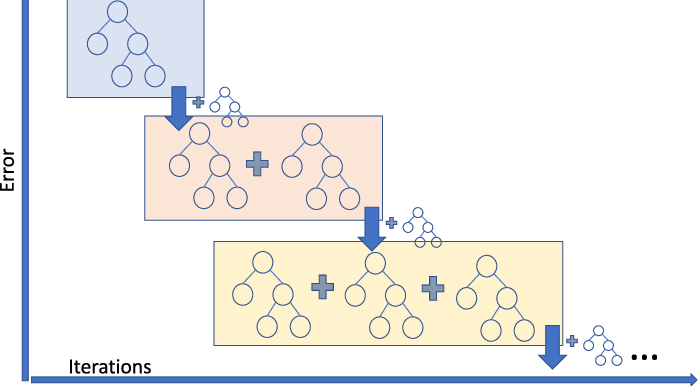

### Criando e treinando o modelo

In [ ]:
reg = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3092.3961,3.024348e+07,5499.4075,0.8086,0.4360,0.2952
1,3287.2176,3.073582e+07,5543.9897,0.8356,0.4680,0.3619
2,3263.4646,2.996779e+07,5474.2840,0.8472,0.4992,0.3666
3,3388.2084,2.937768e+07,5420.1177,0.8104,0.5267,0.3796
4,2320.2496,1.010349e+07,3178.5981,0.9157,0.4508,0.4053
5,2251.7583,1.333799e+07,3652.1210,0.8758,0.4615,0.3825
6,2422.1919,1.754489e+07,4188.6623,0.8540,0.4441,0.3306
7,2656.8978,2.520290e+07,5020.2491,0.8153,0.4398,0.3191
8,2774.8196,2.289831e+07,4785.2177,0.8230,0.5106,0.3053
9,2683.4869,2.562510e+07,5062.1245,0.8339,0.3900,0.2345


É agora que o uso do PyCaret se mostra extremamente valioso. É possível notar que, as métricas obtidas em cada fold ao instanciar o modelo são parecidas com aquelas obtidas no *compare_models*, mas, seria possível melhorá-las? Sim! Isso pode ser feito ao tunarmos os hiperparâmetros, tarefa executada facilmente pela biblioteca. Note que, melhoraremos a métrica definida como nosso "alvo" anteriormente.

### Tunando hiperparâmetros

In [ ]:
# Tunando modelo e imprimindo os melhores hiperparâmetros
tuned_model = tune_model(reg, optimize='MSE')
print(tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3470.7431,3.455423e+07,5878.2844,0.7814,0.7958,0.3145
1,3687.6375,3.456743e+07,5879.4077,0.8151,0.5562,0.4493
2,3350.8786,2.993855e+07,5471.6135,0.8473,0.5214,0.4012
3,3387.0312,2.895181e+07,5380.6882,0.8131,0.5243,0.3885
4,2341.1778,1.159964e+07,3405.8238,0.9032,0.5016,0.3748
5,2230.4567,1.269554e+07,3563.0802,0.8817,0.5078,0.3936
6,2630.0708,1.993618e+07,4464.9944,0.8341,0.5142,0.3619
7,2681.8101,2.602009e+07,5100.9893,0.8093,0.4151,0.2749
8,2979.8398,2.460457e+07,4960.2992,0.8098,0.5386,0.3553
9,2864.8385,2.506757e+07,5006.7528,0.8375,0.3959,0.2584


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=7,
                          min_weight_fraction_leaf=0.0, n_estimators=290,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1304, subsample=0.45, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Com essas linhas de código, é possível notar que esse modelo obteve o melhor Root Mean Squared error quando:
* Utilizou-se o learning rate ($\eta$) igual a 0.05
* Para cada nó, escolheu-se dentre $\sqrt{n_{var}}$ qual seria considerada naquela etapa, onde $n_{var}$ é o número de features do nosso dataset.
* Definiu-se que cada nó deve possuir pelo menos 1 folhas.
* Árvores com profundidade máxima igual a 3
* Criaram-se 270 árvores.

Na tabela de resultados é possível ver que os resultados melhoraram, na maioria das métricas utilizadas para regressão.

Agora, podemos analisar como nosso modelo ficou e o comportamento com os nossos dados. 

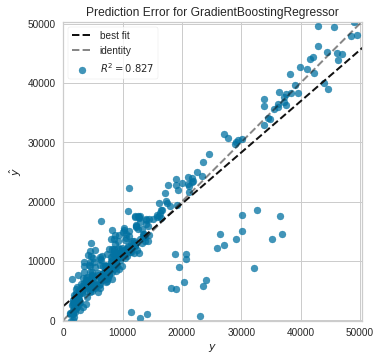

In [ ]:
plot_model(tuned_model, 'error')

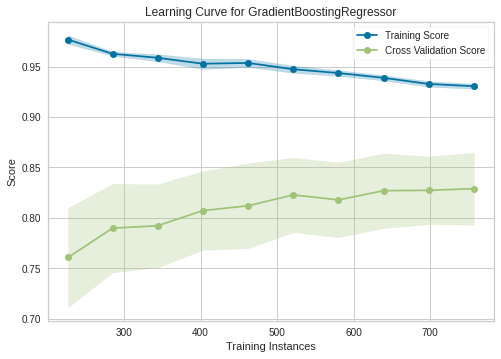

In [ ]:
plot_model(tuned_model, 'learning')

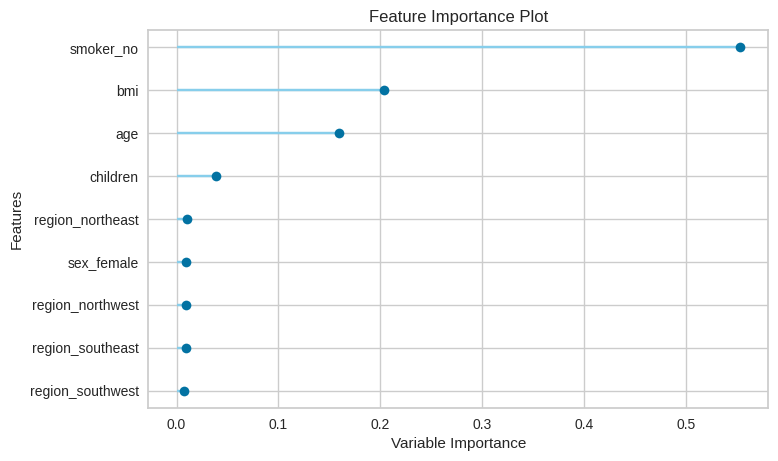

In [ ]:
plot_model(tuned_model, 'feature')

Aqui podemos ver detalhes sobre a construção do nosso modelo, para ainda mais detalhes, veja abaixo:

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Após criar e analisar o modelo, é hora de ver como ele performa no dataset de treino separado pelo PyCaret, pois até agora, nossos resultados foram baseados em validações cruzadas.

### Testando o modelo nos dados

In [ ]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2852.2057,2.240576e+07,4733.4724,0.8271,0.5559,0.3416


,age,bmi,children,sex_female,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,0.781401,-0.486287,-0.063924,1.0,0.0,0.0,0.0,0.0,1.0,24520.263672,28050.691069
1,0.007768,-0.112612,-0.063924,0.0,0.0,1.0,0.0,0.0,0.0,22462.042969,25063.592333
2,0.640740,1.704333,2.420246,1.0,1.0,0.0,1.0,0.0,0.0,11033.662109,22245.899627
3,0.500080,-1.120330,-0.063924,1.0,0.0,0.0,1.0,0.0,0.0,21677.283203,23318.726586
4,-1.469167,0.523038,-0.891980,1.0,1.0,0.0,0.0,1.0,0.0,11482.634766,1421.650314
...,...,...,...,...,...,...,...,...,...,...,...
357,1.695694,-0.463787,-0.891980,1.0,0.0,1.0,0.0,0.0,0.0,29523.166016,30396.874407
358,0.289089,0.858944,1.592189,0.0,0.0,0.0,0.0,1.0,0.0,42124.515625,44338.948683
359,-0.343883,1.848982,0.764133,0.0,1.0,0.0,0.0,1.0,0.0,5124.188477,7324.487103
360,1.484703,-0.277351,-0.891980,0.0,1.0,0.0,0.0,0.0,1.0,12146.970703,17390.607305


Podemos notar que, os resultados desse modelo foram satisfatórios, e parecidos com aqueles obtidos nas etapas anteriores, sinalizando que o modelo não possui *over fitting*.

Agora, chega o momento de finalizar o modelo. Nessa etapa, o PyCaret executa um último treino do modelo, utilizando todo o dataset, inclusive o hold-out definido como teste, ou seja, o modelo já não pode mais realizar previsões no dataset sem *over fitting*. Em tese, isso finalizaria o nosso experimento aqui, mas nós temos uma carta na manga que será mostrada adiante.

In [ ]:
modelo_final = finalize_model(tuned_model)

Antes de começarmos nosso setup, havíamos separado 10% do dataset para realizarmos o treino final. Isso é, 90% dos dados foram usados pelo PyCaret (incluindo o train-test split da biblioteca) e o restante será utilizado como *unseen data*. Abaixo, veja um diagrama de como os dados foram organizados

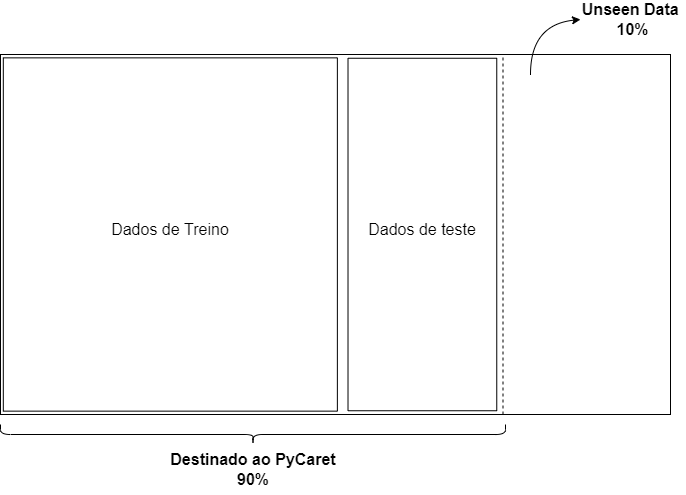

Com isso, podemos fazer uma última previsão, com dados nunca antes vistos pelo modelo.

In [ ]:
unseen_data = predict_model(modelo_final, data=test)
unseen_data.head(10)

,age,sex,bmi,children,smoker,region,charges,Label
640,33,male,42.400,5,no,southwest,6666.24300,4575.005147
189,29,female,32.110,2,no,northwest,4922.91590,7928.627430
645,48,male,30.780,3,no,northeast,10141.13620,10381.239689
530,57,male,42.130,1,yes,southeast,48675.51770,46961.006410
63,28,female,25.935,1,no,northwest,4133.64165,6241.111083
38,35,male,36.670,1,yes,northeast,39774.27630,43605.887378
371,57,female,22.230,0,no,northeast,12029.28670,11085.520774
697,41,male,35.750,1,yes,southeast,40273.64550,41374.148058
676,55,female,40.810,3,no,southeast,12485.80090,15164.910561
563,50,male,44.770,1,no,southeast,9058.73030,8745.811040


Aqui, é possível ver que o modelo ainda possui um erro considerável entre 1000 e 1500 dólares, isso ocorre pois, apesar de todas as otimizações, o nosso dataset possui poucas features, incluindo uma com importância altissima, algo que prejudica um pouco das previsões. Isso não é algo que afetaria o funcionamento da ferramenta, por exemplo, se estivéssemos bolando uma API para simular a contratação do custo do plano de saúde.

In [ ]:
save_model(modelo_final, 'gbr_predictHealthCare-28-01')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['sex', 'smoker',
                                                             'region'],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['bmi', 'age',
                                                           'children'],
                                       target='charges', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=No...
                                            learning_rate=0.05, loss='ls',
                                            max_depth=4, max_features='sqrt',
                                            max_leaf_nodes=None,
                                       